## Principal Components Analysis

Dimensionality reduction of a dataset is very useful to address two concerns. Primarily, it analyses correlation in a dataset and reduces the original features (variables) to a set of uncorrelated features. This reduces the complexity (dimensionality) of the dataset while retaining most of the information.

The other concern that often needs to be addressed before analysing a dataset further is noise. Dimensionality reduction via PCA does not remove noise directly, but often will reduce noise because noise will affect all variables.

I will be using a dataset on wine for this exercise and a principal component analysis (PCA) to reduce dimensionality.

In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

#Loading the dataset
df = pd.read_csv(r"C:\data\wine-pca\Wine.csv")


Let's have a quick look at the dataset

In [2]:
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


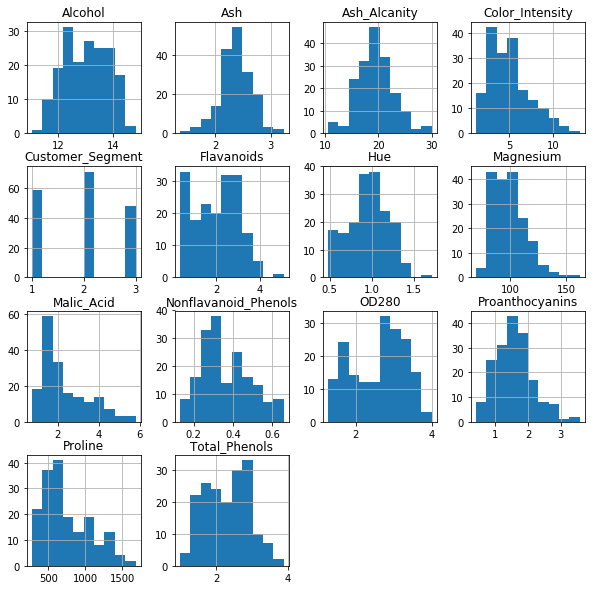

In [3]:
df.hist(figsize = (10,10))
plt.show()

We can see that there are 3 customer segments, fairly equally represented. A machine learning exercise would possibly be interested in predicting the customer segments of wines based on their other variables, for example by classifying with a decision tree algorithm. We might also be interested in clustering the wines to see if we can identify the customer segments by the resulting clusters.

In that case we would want to make sure that we keep the customer segment variable as is. Let's therefore split this variable out into a y set

In [4]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

Let's check if that went OK

In [5]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Let's now map the correlation between the variables in a heatmap to get a sense

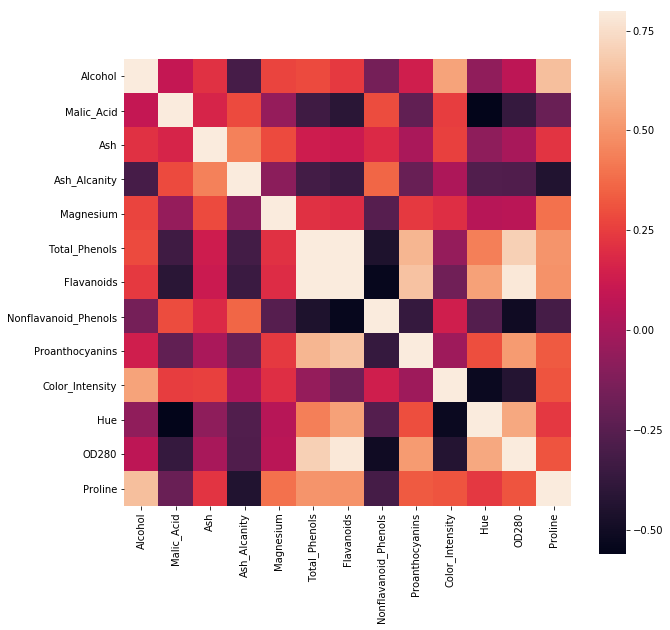

In [6]:
corrmat = X.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

This heatmap shows us that there are many correlated variables in this set. As an example, wines with high level of Flavanoids in most cases have low level of Nonflavanoid_Phenols (Seems logical enough) and high OD280.  

This is a good starting point for our PCA, since it works with correlation.

The first thing we need to do is to create the covariance matrix for the dataset

In [7]:
#Standardize the dataset to a unit scale for efficiency
X_std = StandardScaler().fit_transform(X)

#calculating the mean vector
mean_vec = np.mean(X_std, axis = 0)

#creating the covariance matrix. dot for dot product, shape for the number of variables (size).
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] - 1)

print(cov_mat)


[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

Next is the eigendecomposition of the covariance matrix

In [9]:
eigen_vals, eigen_vec = np.linalg.eig(cov_mat)
print(eigen_vals)
print('\n')
print(eigen_vec)

[ 4.73243698  2.51108093  1.45424187  0.92416587  0.85804868  0.64528221
  0.55414147  0.10396199  0.35046627  0.16972374  0.29051203  0.22706428
  0.25232001]


[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.065039

Now, all that's left is to pick the pick the eigenvalues with the highest values and use the corresponding eigenvectors.



In [10]:
#Pair the eigenvalues with the eigenvectors
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vec[:,i]) for i in range(len(eigen_vals))]

#Sorting the eigenvalues
eigen_pairs.sort(reverse=True)

eigen_val_sort = list()

for i in eigen_pairs:
    print(i[0])
    eigen_val_sort.append(i[0])
    

4.73243697758
2.51108092965
1.45424186785
0.924165866825
0.858048676537
0.645282212468
0.554141466246
0.350466274946
0.290512032694
0.252320010361
0.227064281731
0.16972373898
0.103961991821


But how many do we pick?

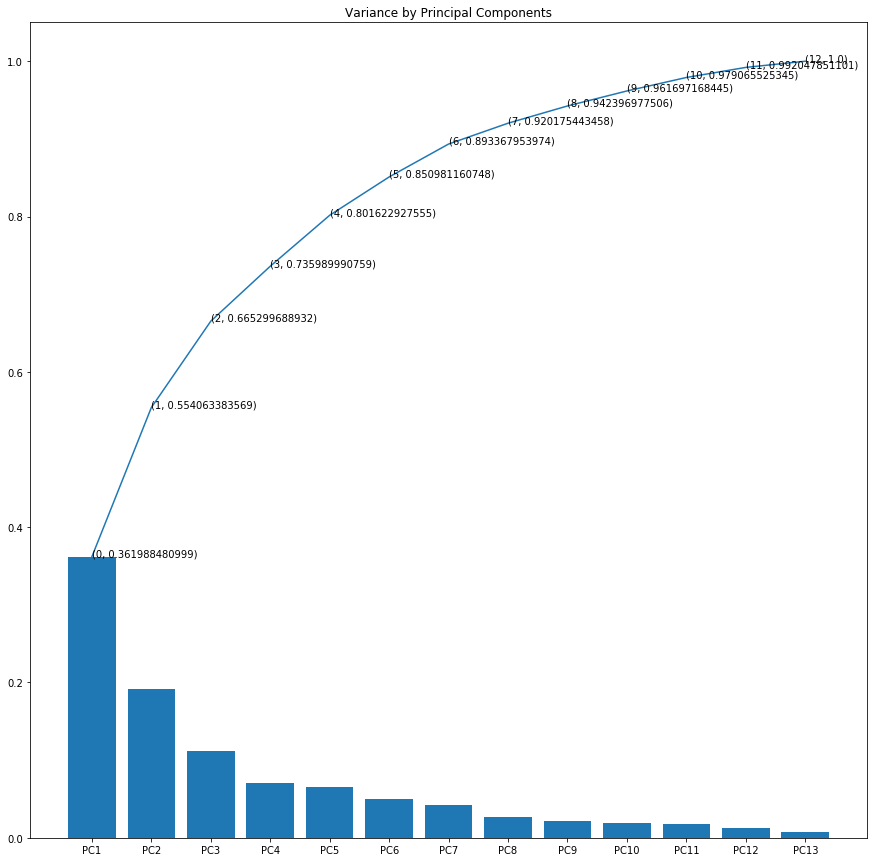

In [11]:
#Calculating the total variance
total_var = sum(eigen_vals)
var_exp = [(i / total_var) for i in sorted(eigen_vals, reverse=True)]
cumulative_var = np.cumsum(var_exp)

objects = list()
for i in range(len(eigen_vals)):
    objects.append('PC' + str(i+1))

y_pos = np.arange(len(objects))

plt.figure(figsize = (15,15))
plt.bar(y_pos, eigen_val_sort / total_var, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.title('Variance by Principal Components')
plt.plot(y_pos, cumulative_var)
for xy in zip(y_pos, cumulative_var):                                       # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.show()


The two first principal components explain 55.4 % of the variance. Keeping only these two is probably to much of a trade off.

However, two vectors is easy to visualize, so let's still pick those two and see what kind of representation we are left with

In [12]:
matrix = np.hstack((eigen_pairs[0][1].reshape(13,1),
                   eigen_pairs[1][1].reshape(13,1)))
print(matrix)



[[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


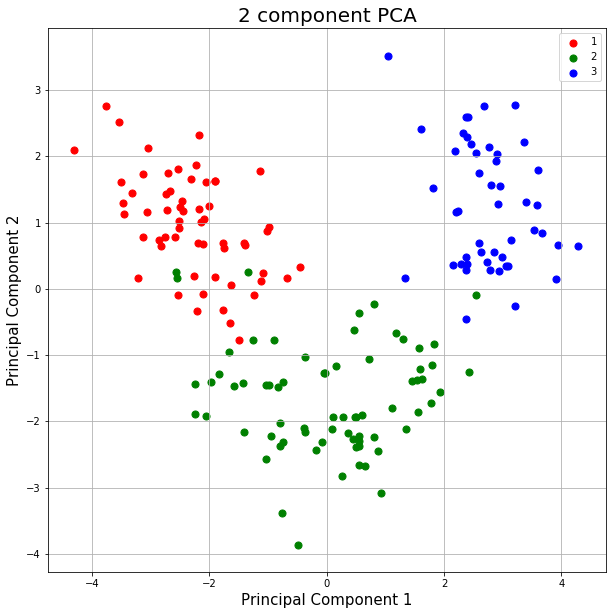

In [13]:
Y = X_std.dot(matrix)

Y_df = pd.DataFrame(data = Y, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([Y_df, df[['Customer_Segment']]], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Customer_Segment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()



Even with only 55.4 % of the variance kept, we can still see that the wines are fairly separated based on customer segment.

## Classifying Customer Segment with a Decision Tree Algorithm

In order to check the usefulness of this dimensionality reduction, outside of visualizing the result, we can apply a multiclass classifier to the original dataset and to the reduced set and compare the results.

In order to be able to test, let's split both sets into a training set and a test set

In [14]:
print(df.shape)

(178, 14)


In [15]:
#randomize the sets
df = df.sample(frac=1)
finalDf = finalDf.sample(frac=1)

In [16]:
X_orig = df.iloc[:,0:13]
y_orig = df.iloc[:,13]

X_pca = finalDf.iloc[:,0:2]
y_pca = finalDf.iloc[:,2]

y_orig.tail()

98     2
114    2
23     1
138    3
27     1
Name: Customer_Segment, dtype: int64

In [17]:
X_train = X_orig.iloc[0:40,:]
y_train = y_orig.iloc[0:40]

X_train_pca = X_pca.iloc[0:40,:]
y_train_pca = y_pca.iloc[0:40]

X_test = X_orig.iloc[40:-1,:]
y_test = y_orig.iloc[40:-1]

X_test_pca = X_pca.iloc[40:-1,:]
y_test_pca = y_pca.iloc[40:-1]

X_train.tail()

print(X_test.shape)
print(X_test_pca.shape)
print(X_train.shape)
print(X_train_pca.shape)
print(y_test.shape)
print(y_test_pca.shape)
print(y_train.shape)
print(y_train_pca.shape)


(137, 13)
(137, 2)
(40, 13)
(40, 2)
(137,)
(137,)
(40,)
(40,)


The datasets are divided into training sets with 40 rows for training and 137 rows for testing

First we will try to predict the customer segment with a decision tree classifier by using the original dataset:

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 4)

#training the model
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
#predicting
predictions = dtree_model.predict(X_test)

print(predictions)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[2 1 3 1 2 1 1 3 1 2 3 1 3 3 3 3 1 1 2 2 1 3 2 1 3 1 2 2 2 1 1 1 1 1 1 1 2
 1 2 1 2 2 2 1 1 3 1 2 1 1 1 2 3 1 2 3 2 2 1 3 1 1 2 3 2 2 3 3 1 3 2 2 1 1
 2 2 1 3 1 2 1 3 3 3 2 1 3 2 3 2 1 2 2 2 1 1 3 2 3 3 2 1 2 1 2 3 3 2 2 2 1
 3 1 2 1 2 1 1 1 1 2 1 1 3 1 1 3 1 1 1 1 1 2 1 2 1 3]
[[44  0  0]
 [10 44  4]
 [ 6  1 28]]


In [20]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.73      1.00      0.85        44
          2       0.98      0.76      0.85        58
          3       0.88      0.80      0.84        35

avg / total       0.87      0.85      0.85       137



Here, we can see the precision and recall for the 3 different customer segments. E.g. 90% the rows predicted to be customer segment 1 was accurate and 96% of the real customer segment 1 was accurately predicted. 

In other words, 10 % of customer segment 1 was not detected (false negative), and 4 % of the predicted customer segment 1 was not correct (false positive). 

Now we'll try with the reduced dataset (PCM1 and PCM2):

In [21]:
dtree_pca = DecisionTreeClassifier(max_depth = 4)

#training the model
dtree_pca.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
#predicting
predictions_pca = dtree_pca.predict(X_test_pca)

print(predictions_pca)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_pca,predictions_pca))

[1 1 2 1 3 1 2 1 3 2 1 2 2 2 1 2 3 2 2 2 2 1 1 2 1 1 1 2 3 3 3 2 1 1 1 3 1
 2 2 3 2 1 3 3 3 2 2 1 3 1 3 3 2 3 2 1 2 1 3 3 1 1 1 1 2 2 1 1 2 1 1 2 1 3
 2 1 3 1 3 1 2 2 2 1 2 2 1 3 3 3 1 2 3 3 1 1 2 1 3 2 2 1 2 2 2 3 1 2 2 1 1
 1 1 2 2 2 2 1 3 3 1 3 2 2 3 3 1 1 1 3 2 3 1 3 2 2 3]
[[45  2  0]
 [ 4 48  7]
 [ 2  0 29]]


In [23]:
print(classification_report(y_test,predictions_pca))

             precision    recall  f1-score   support

          1       0.27      0.32      0.29        44
          2       0.52      0.45      0.48        58
          3       0.19      0.20      0.20        35

avg / total       0.36      0.34      0.35       137



With the principal components, the same classifier gives a poor result.

## Classifying Customer Segment with a Support Vector Machine Algorithm

Now, let's try with a Support Vector Machine algorithm, and compare the result again:

In [24]:
from sklearn import svm

In [25]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
predictions_svm = svm_model.predict(X_test)
print(classification_report(y_test,predictions_svm))

             precision    recall  f1-score   support

          1       0.33      1.00      0.50        44
          2       1.00      0.07      0.13        58
          3       1.00      0.03      0.06        35

avg / total       0.79      0.36      0.23       137



In [30]:
svm_pca = svm.SVC()
svm_pca.fit(X_train_pca, y_train_pca)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
predictions_svm_pca = svm_pca.predict(X_test_pca)
print(classification_report(y_test_pca,predictions_svm_pca))

             precision    recall  f1-score   support

          1       0.94      0.98      0.96        47
          2       0.98      0.95      0.97        59
          3       1.00      1.00      1.00        31

avg / total       0.97      0.97      0.97       137



Here we can see that the support vector machine predicts better with the principal components.

We are also able to visualize the result:

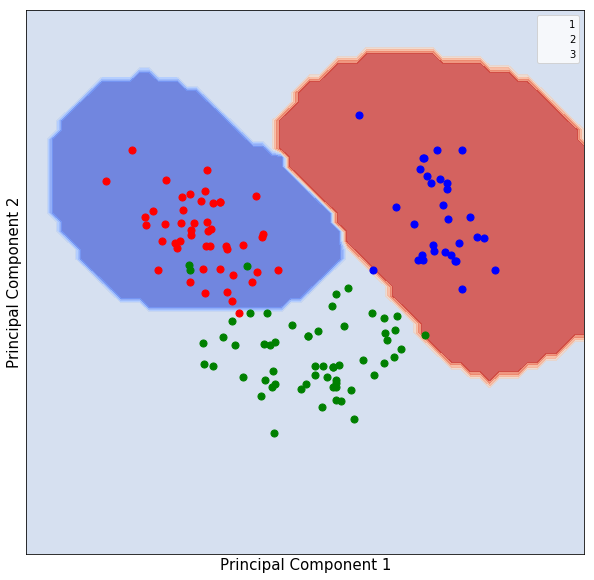

In [32]:
X_y_merged = pd.concat([X_test_pca, y_test_pca], axis=1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)

h = 0.2  # step size in the mesh

x_min, x_max = -6,6
y_min, y_max = -6,6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))
 
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = X_y_merged['Customer_Segment'] == target
    ax.scatter(X_y_merged.loc[indicesToKeep, 'principal component 1']
               , X_y_merged.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
#plt.scatter(X_y_merged.iloc[:, 0], X_y_merged.iloc[:, 1])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

ax.legend(targets)
ax.grid()
 
plt.show()

As we can see in the classification report and the graph, customer segment 3 (blue dots) has 100% precision and recall.